In [42]:
# import nesesary libaries
import pandas as pd # data analysis, origizational, manipulation libary
import numpy as np #math libary
import matplotlib.pyplot as plt #plotting libary- data visualization
import seaborn as sns #plotting libary- data visualization
from sklearn.linear_model import LinearRegression

In [43]:
happy2020 = pd.read_csv('data/happiness2020.csv')

## Big Data
- not big data
- larger data is more aacurate

In [44]:
happy2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


## EDA -- Exploratory Data Analysis
- look for trends and relations


Text(0.5, 1.0, 'Logged GDP per capta vs Ladder score')

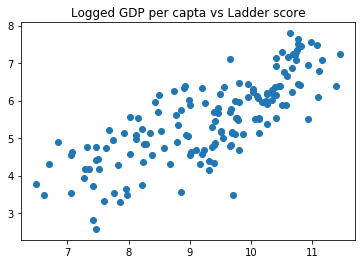

In [45]:
plt.scatter(x = happy2020['Logged GDP per capita'], y = happy2020['Ladder score'])
plt.title("Logged GDP per capta vs Ladder score")

Text(0.5, 1.0, 'Freedom to make life choices  vs Ladder score')

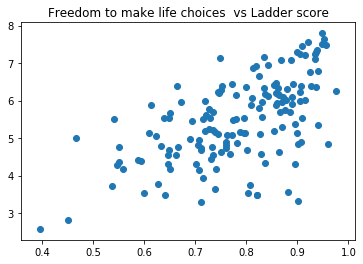

In [46]:
plt.scatter(x = happy2020['Freedom to make life choices'], y = happy2020['Ladder score'])
plt.title("Freedom to make life choices  vs Ladder score")


Text(0.5, 1.0, 'Social support vs Ladder score')

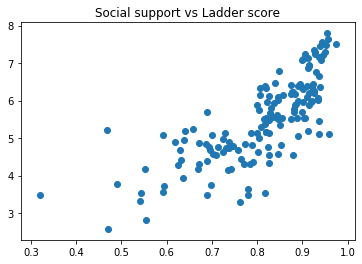

In [47]:
plt.scatter(x = happy2020['Social support'], y = happy2020['Ladder score'])
plt.title("Social support vs Ladder score")

Text(0.5, 1.0, 'Dystopia + residual vs Ladder score')

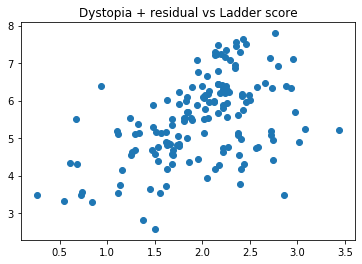

In [48]:
plt.scatter(x = happy2020['Dystopia + residual'], y = happy2020['Ladder score'])
plt.title("Dystopia + residual vs Ladder score")

### using
- logged GDP per capita
- social support
- Life expectancy
- perception of coruption


In [49]:
#gdp
gdp_corr = happy2020['Logged GDP per capita'].corr(happy2020['Ladder score'])
gdp_corr

0.7753744007526836

In [50]:
social_corr = happy2020['Social support'].corr(happy2020['Ladder score'])
social_corr

0.7650007567161378

In [51]:
life_corr = happy2020['Healthy life expectancy'].corr(happy2020['Ladder score'])
life_corr

0.7703162898718492

In [52]:
corupt_corr = happy2020['Perceptions of corruption'].corr(happy2020['Ladder score'])
corupt_corr

-0.41830508725590965

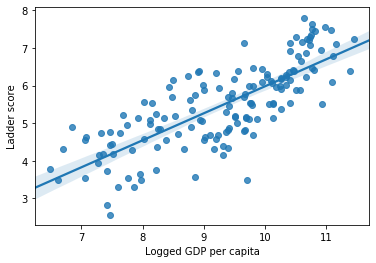

In [53]:
sns.regplot(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

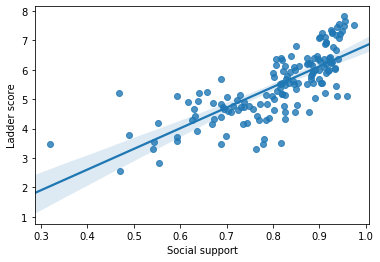

In [54]:
sns.regplot(happy2020['Social support'], happy2020['Ladder score'])

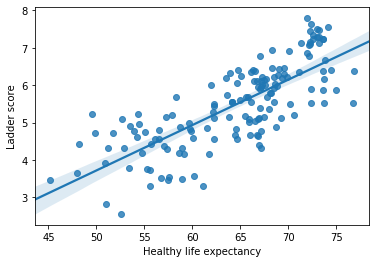

In [55]:
sns.regplot(happy2020['Healthy life expectancy'], happy2020['Ladder score'])

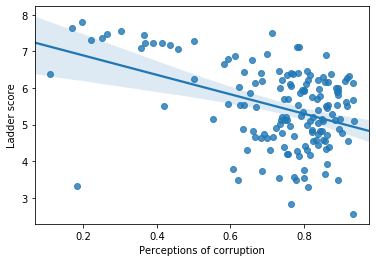

In [56]:
sns.regplot(happy2020['Perceptions of corruption'], happy2020['Ladder score'])

In [57]:
# gdp vs ladder score
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

In [58]:
def regModel(GDP):
    result = slope*GDP+intercept
    return result


In [59]:
happy2020['Ladder score predicted'] = happy2020.apply(lambda r: regModel(r['Logged GDP per capita']), axis = 1)

- exploratory Analysis
- find corelation
- plot

In [60]:
def percentError(r):
    score = r['Ladder score']
    predicted = r['Ladder score predicted']
    error = (predicted-score)/score
    return error

In [61]:
happy2020['Error'] = happy2020.apply(lambda r: percentError(r), axis = 1)

In [62]:
def r2(original, new):
    avg = original.mean()
    denominator = sum((original-new)**2)
    numerator = sum((original-avg)**2)
    return 1 - (denominator/numerator)
r2(happy2020['Ladder score'], happy2020['Ladder score predicted'])

0.601205461342584

In [63]:
y = happy2020['Ladder score']#predicted variable
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption']]#variables using to predict

In [64]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
happy2020['Predict1'] = pd.Series(reg.predict(x))

In [66]:
happy2020[['Ladder score', 'Ladder score predicted', 'Predict1']]

,Ladder score,Ladder score predicted,Predict1
0,7.8087,6.437565,6.973550
1,7.6456,6.534269,7.093391
2,7.5599,6.682074,7.076252
3,7.5045,6.533234,6.475724
4,7.4880,6.759498,7.193690
5,7.4489,6.562053,6.896256
6,7.3535,6.523354,6.989782
7,7.2996,6.338285,6.852762
8,7.2942,6.511892,6.696432
9,7.2375,7.019948,7.316119


In [67]:
reg.score(x,y)# r2 fit this one 62%

0.6295922583301733

In [68]:
#add another demension
y = happy2020['Ladder score']#predicted variable
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption', 'Social support']]#variables using to predict

In [69]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
happy2020['Predict1'] = pd.Series(reg.predict(x))

In [71]:
reg.score(x, y)

0.7027029520303831

In [76]:
#add another demension
y = happy2020['Ladder score']#predicted variable
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption', 'Social support', 'Healthy life expectancy']]#variables using to predict

In [77]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
happy2020['Predict1'] = pd.Series(reg.predict(x))

In [79]:
reg.score(x, y)

0.718485327858638

In [80]:
#add another demension
y = happy2020['Ladder score']#predicted variable
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption', 'Social support', 'Healthy life expectancy','Freedom to make life choices' ]]#variables using to predict

In [81]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
happy2020['Predict1'] = pd.Series(reg.predict(x))

In [85]:
reg.score(x, y)

0.7457743857224949